<a href="https://colab.research.google.com/github/SourajitaDewasi/StasticalDataAnalysis/blob/main/191000050_SourajitaDewasi_DL_CourseProject2_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Connecting Kaggle Dataset through API
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prasunroy/natural-images
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 97% 331M/342M [00:01<00:00, 199MB/s]
100% 342M/342M [00:01<00:00, 180MB/s]
Archive:  natural-images.zip
replace data/natural_images/airplane/airplane_0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
#importing necessary libraries
import pandas as pd                                   #reading the data
import numpy as np                                    #for linear array, matrices
import seaborn as sns                                 #for visualization in form of graphs
from matplotlib import pyplot as plt                  #for showing images
from sklearn.metrics import accuracy_score            #to calculate accuracy
import os                                             #for opening directories
import PIL                                            #for opening picture files
from PIL import Image
from sklearn.model_selection import train_test_split  #for creating testing and training split

In [ ]:
#importing keras for building the CNN model
import keras
#importing the model and layers 
from keras import models, layers
#all the functions from Keras and Tensorflow
from tensorflow.keras.utils import to_categorical      #to convert labels into categorical variable using hot-ecoding
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model                    #to plot the model

In [ ]:
x_data,x1_data,y_data=[],[],[]
#listing the directories
dirs = ['/content/natural_images/airplane','/content/natural_images/cat','/content/natural_images/car','/content/natural_images/dog','/content/natural_images/flower','/content/natural_images/fruit','/content/natural_images/motorbike','/content/natural_images/person']

#we will switch the y label when we finish with a directory
current_y_label = 0
for dirname, _, filenames in os.walk('/content/natural_images'):
    
    #if the directory name is not valid, begin the next iteration
    if dirname not in dirs: continue
    #for each file (image.png) in the filenames
    for filename in filenames: 
        #combine paths to form complete directory
        directory = os.path.join(dirname, filename)
        #read image from directory using Image
        img = Image.open(directory)
        #reshape the image to (128, 128). This maintains the aspect ratio of all the images as same
        img = img.resize((128,128), Image.ANTIALIAS)
        #we can convert to an array directly using np.array(PIL image)
        img = np.array(img)        
        #append the y label as the y label
        y_data.append(current_y_label)
        #append the array to x_data
        x_data.append(img)
        #append the array after normalizing it by dividing it by 255 to x1_data
        x1_data.append(img/255)
    #we're finished with the directory. time to change the y label
    current_y_label += 1

In [ ]:
#reading sample images 
image = plt.imread('/content/natural_images/airplane/airplane_0000.jpg')
image1 = plt.imread('/content/natural_images/car/car_0010.jpg')
image2 = plt.imread('/content/natural_images/person/person_0050.jpg')
image3 = plt.imread('/content/natural_images/fruit/fruit_0250.jpg')

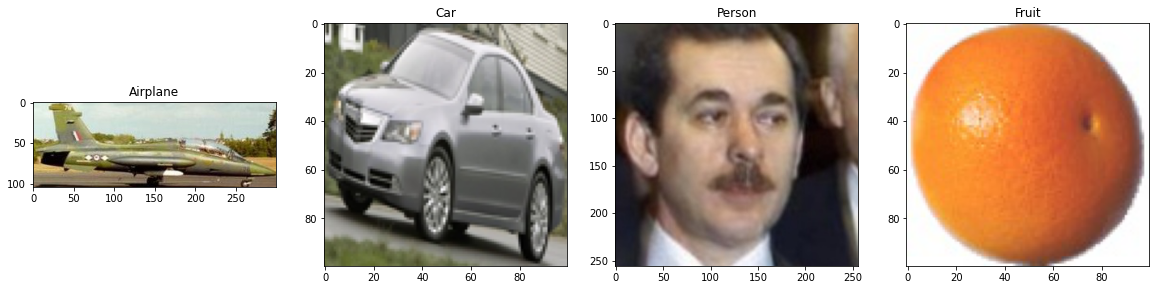

In [ ]:
#Plotting all the sample images
fx, plots = plt.subplots(1, 4, figsize=(20,10))

plots[0].set_title("Airplane")
plots[0].imshow(image)

plots[1].set_title("Car")
plots[1].imshow(image1)

plots[2].set_title("Person")
plots[2].imshow(image2)

plots[3].set_title("Fruit")
plots[3].imshow(image3)

We see that all the images are in different shapes on the plot scale. Printing their shapes

In [ ]:
print("Shape of Image 1", image.shape)
print("Shape of Image 2", image1.shape)
print("Shape of Image 3", image2.shape)
print("Shape of Image 4", image3.shape)

Shape of Image 1 (104, 300, 3)
Shape of Image 2 (100, 100, 3)
Shape of Image 3 (256, 256, 3)
Shape of Image 4 (100, 100, 3)


We need to resize the image to get the same number of pixels to be used as input neuron values.

In [ ]:
#Instead of using PANDAS dataframe, we will be converting x and y into numpy array
x=np.array(x_data)
x1=np.array(x1_data)
y=np.array(y_data)
#hot encoding the labels or y array
y = to_categorical(y_data)
#printing shape of the data (x:predictor variable, y:labels)
print("Shape of predictor variable w/o normalization: ",x.shape)
print("Shape of predictor variable with normalization: ",x1.shape)
print("Shape of target variable: ",y.shape)

Shape of predictor variable w/o normalization:  (6899, 128, 128, 3)
Shape of predictor variable with normalization:  (6899, 128, 128, 3)
Shape of target variable:  (6899, 8)


So, we have 6899 images with 128x128 dimension and 8 labels or target classes.

In [ ]:
#Shuffling our training dataset to avoid risk of any previous order
r = np.arange(x.shape[0])
np.random.seed(42)
np.random.shuffle(r)
x = x[r]
y = y[r]
x1 = x1[r] #the normalizaton case

In [ ]:
#splitting the dataset into training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
#splitting the dataset into training and testing dataset after normalization
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, y, test_size = 0.2)

In [ ]:
#printing the testing and training datasets shape without input normalization
print("Shape of training predictor variable: ",X_train.shape)
print("Shape of training target variable: ",Y_train.shape)
print("Shape of testing predictor variable: ",X_test.shape)
print("Shape of testing target variable: ",Y_test.shape)

Shape of training predictor variable:  (5519, 128, 128, 3)
Shape of training target variable:  (5519, 8)
Shape of testing predictor variable:  (1380, 128, 128, 3)
Shape of testing target variable:  (1380, 8)


In [ ]:
#For the model where the input is normalized
print("Shape of training predictor variable: ",X1_train.shape)
print("Shape of training target variable: ",Y1_train.shape)
print("Shape of testing predictor variable: ",X1_test.shape)
print("Shape of testing target variable: ",Y1_test.shape)

Shape of training predictor variable:  (5519, 128, 128, 3)
Shape of training target variable:  (5519, 8)
Shape of testing predictor variable:  (1380, 128, 128, 3)
Shape of testing target variable:  (1380, 8)


In [ ]:
#structuring the MLP model or ANN model
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(128,128,3)))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(8,activation="softmax"))
#seeing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 300)               14745900  
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 8)                 808       
                                                                 
Total params: 14,776,808
Trainable params: 14,776,808
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#setting weights and biases for 1st hidden layer in the model
weights,biases=model.layers[1].get_weights()
weights

array([[-7.0380592e-03, -1.7624293e-03,  3.8225828e-03, ...,
        -8.4185107e-03, -9.5208613e-03,  9.7190589e-04],
       [ 2.0932248e-03, -5.0357971e-03, -3.6668964e-05, ...,
         2.4414239e-03, -9.8368870e-03,  3.9524995e-03],
       [-1.0575589e-02, -2.8969841e-03, -2.6366580e-04, ...,
         7.2045382e-03,  2.6247995e-03, -8.6962152e-04],
       ...,
       [-5.3511928e-03, -5.2007549e-03,  9.5349327e-03, ...,
         5.6995396e-03,  8.6410865e-03,  3.9839773e-03],
       [-5.1719011e-03, -2.7386416e-03, -1.0388479e-02, ...,
        -7.8794938e-03,  3.4711557e-03,  1.0761222e-02],
       [-2.6309183e-03, -9.2651825e-03, -5.0547812e-04, ...,
         4.0625175e-03,  5.6643598e-03,  6.6047236e-03]], dtype=float32)

In [ ]:
#printing shape of random weights and bias=0 initially
print("Shape of Weight",weights.shape)
print("Shape of Bias",biases.shape)

Shape of Weight (49152, 300)
Shape of Bias (300,)


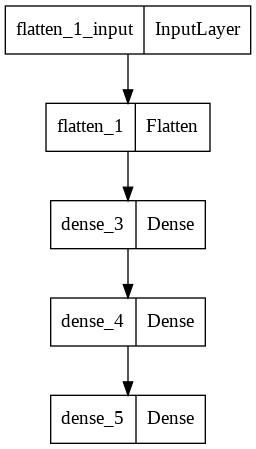

In [ ]:
#plot the ANN model
plot_model(model)

### BEFORE NORMALIZATION

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 before normalization
history = model.fit(X_train, Y_train, epochs=30, validation_split=0.2)

Epoch 1/30
138/138 [==============================] - 18s 126ms/step - loss: 940.5753 - accuracy: 0.4668 - val_loss: 278.8138 - val_accuracy: 0.6359
Epoch 2/30
138/138 [==============================] - 17s 125ms/step - loss: 352.9565 - accuracy: 0.5814 - val_loss: 307.9713 - val_accuracy: 0.6042
Epoch 3/30
138/138 [==============================] - 17s 124ms/step - loss: 202.1406 - accuracy: 0.6290 - val_loss: 190.1347 - val_accuracy: 0.6386
Epoch 4/30
138/138 [==============================] - 17s 124ms/step - loss: 111.3469 - accuracy: 0.6840 - val_loss: 182.5141 - val_accuracy: 0.5797
Epoch 5/30
138/138 [==============================] - 17s 124ms/step - loss: 93.8600 - accuracy: 0.6843 - val_loss: 117.8017 - val_accuracy: 0.6005
Epoch 6/30
138/138 [==============================] - 17s 124ms/step - loss: 49.6003 - accuracy: 0.6958 - val_loss: 89.1464 - val_accuracy: 0.5697
Epoch 7/30
138/138 [==============================] - 17s 125ms/step - loss: 37.5630 - accuracy: 0.6648 - val

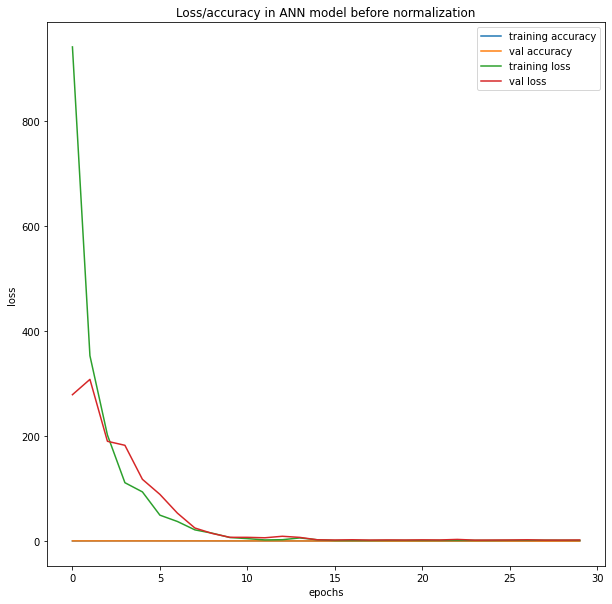

In [ ]:
#ANN model before normalization
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy in ANN model before normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#Evaluation of model
model.evaluate(X_test, Y_test)

44/44 [==============================] - 2s 35ms/step - loss: 1.9672 - accuracy: 0.2703


[1.967193841934204, 0.2702898681163788]

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
#converting over Y test to actual labels.
Y_test = np.argmax(Y_test, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, classes_x))

              precision    recall  f1-score   support

           0       0.16      1.00      0.28       196
           1       1.00      0.03      0.05       186
           2       1.00      0.01      0.01       178
           3       1.00      0.05      0.10       148
           4       0.00      0.00      0.00       146
           5       0.92      0.26      0.41       179
           6       0.97      0.59      0.74       196
           7       0.00      0.00      0.00       151

    accuracy                           0.27      1380
   macro avg       0.63      0.24      0.20      1380
weighted avg       0.65      0.27      0.22      1380



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y_test, classes_x)

array([[[ 185,  999],
        [   0,  196]],

       [[1194,    0],
        [ 181,    5]],

       [[1202,    0],
        [ 177,    1]],

       [[1232,    0],
        [ 140,    8]],

       [[1234,    0],
        [ 146,    0]],

       [[1197,    4],
        [ 132,   47]],

       [[1181,    3],
        [  80,  116]],

       [[1228,    1],
        [ 151,    0]]])

### AFTER NORMALIZATION

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history = model.fit(X1_train, Y1_train, epochs=30, validation_split=0.2)

Epoch 1/30
138/138 [==============================] - 13s 90ms/step - loss: 4.5018 - accuracy: 0.4834 - val_loss: 1.6889 - val_accuracy: 0.6295
Epoch 2/30
138/138 [==============================] - 12s 89ms/step - loss: 1.2132 - accuracy: 0.6682 - val_loss: 0.9476 - val_accuracy: 0.7002
Epoch 3/30
138/138 [==============================] - 12s 88ms/step - loss: 1.1209 - accuracy: 0.6849 - val_loss: 1.2545 - val_accuracy: 0.6232
Epoch 4/30
138/138 [==============================] - 12s 87ms/step - loss: 0.7888 - accuracy: 0.7400 - val_loss: 1.3197 - val_accuracy: 0.6594
Epoch 5/30
138/138 [==============================] - 12s 88ms/step - loss: 0.7739 - accuracy: 0.7452 - val_loss: 1.1789 - val_accuracy: 0.6784
Epoch 6/30
138/138 [==============================] - 12s 87ms/step - loss: 0.6700 - accuracy: 0.7780 - val_loss: 0.8116 - val_accuracy: 0.7237
Epoch 7/30
138/138 [==============================] - 12s 88ms/step - loss: 0.6567 - accuracy: 0.7715 - val_loss: 1.1325 - val_accuracy:

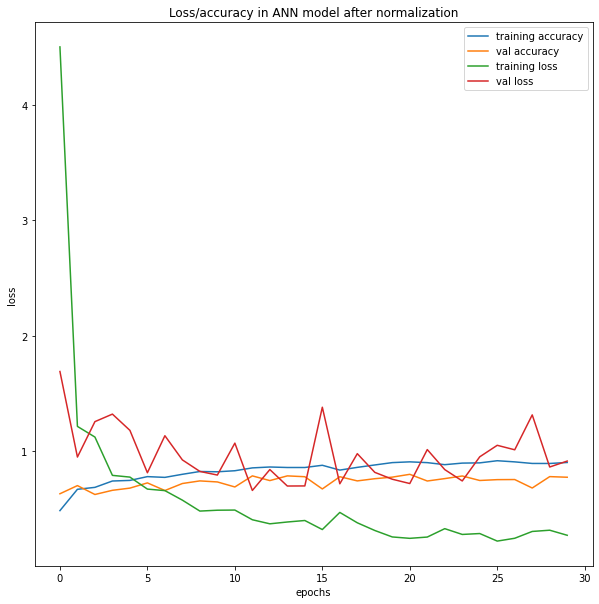

In [ ]:
#ANN model after normalization
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#Evaluation of model
model.evaluate(X1_test, Y1_test)

44/44 [==============================] - 1s 23ms/step - loss: 0.9585 - accuracy: 0.7457


[0.9585289359092712, 0.7456521987915039]

In [ ]:
predict_x=model.predict(X1_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
classes_x

array([1, 6, 0, ..., 2, 1, 0])

In [ ]:
#converting over Y test to actual labels.
Y1_test = np.argmax(Y1_test, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test, classes_x))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       206
           1       0.48      0.85      0.62       163
           2       0.49      0.57      0.52       175
           3       0.98      0.77      0.86       143
           4       0.45      0.10      0.17       138
           5       0.90      0.72      0.80       196
           6       0.88      0.99      0.93       207
           7       0.90      0.81      0.85       152

    accuracy                           0.75      1380
   macro avg       0.75      0.72      0.71      1380
weighted avg       0.76      0.75      0.73      1380



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, classes_x)

array([[[1151,   23],
        [   7,  199]],

       [[1070,  147],
        [  25,  138]],

       [[1101,  104],
        [  76,   99]],

       [[1235,    2],
        [  33,  110]],

       [[1225,   17],
        [ 124,   14]],

       [[1169,   15],
        [  55,  141]],

       [[1144,   29],
        [   2,  205]],

       [[1214,   14],
        [  29,  123]]])

Done for final test

In [ ]:
#trying RMSprop and Adam optimizers with different learning rates
from tensorflow.keras.optimizers import Adam,RMSprop
opt_a1=Adam(lr=0.01)
opt_a2=RMSprop(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### TRYING OPTIMIZER ADAM WITH LEARNING RATE=0.01


In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt_a1, metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history = model.fit(X1_train, Y1_train, epochs=30, validation_split=0.2)

Epoch 1/30
138/138 [==============================] - 13s 91ms/step - loss: 28.6827 - accuracy: 0.1411 - val_loss: 2.0713 - val_accuracy: 0.1504
Epoch 2/30
138/138 [==============================] - 12s 89ms/step - loss: 2.0726 - accuracy: 0.1436 - val_loss: 2.0696 - val_accuracy: 0.1504
Epoch 3/30
138/138 [==============================] - 12s 89ms/step - loss: 2.3545 - accuracy: 0.1481 - val_loss: 2.0704 - val_accuracy: 0.1377
Epoch 4/30
138/138 [==============================] - 12s 89ms/step - loss: 2.0717 - accuracy: 0.1386 - val_loss: 2.0690 - val_accuracy: 0.1377
Epoch 5/30
138/138 [==============================] - 12s 89ms/step - loss: 2.0717 - accuracy: 0.1438 - val_loss: 2.0691 - val_accuracy: 0.1504
Epoch 6/30
138/138 [==============================] - 12s 89ms/step - loss: 2.0716 - accuracy: 0.1434 - val_loss: 2.0689 - val_accuracy: 0.1504
Epoch 7/30
138/138 [==============================] - 12s 89ms/step - loss: 2.0718 - accuracy: 0.1445 - val_loss: 2.0691 - val_accuracy

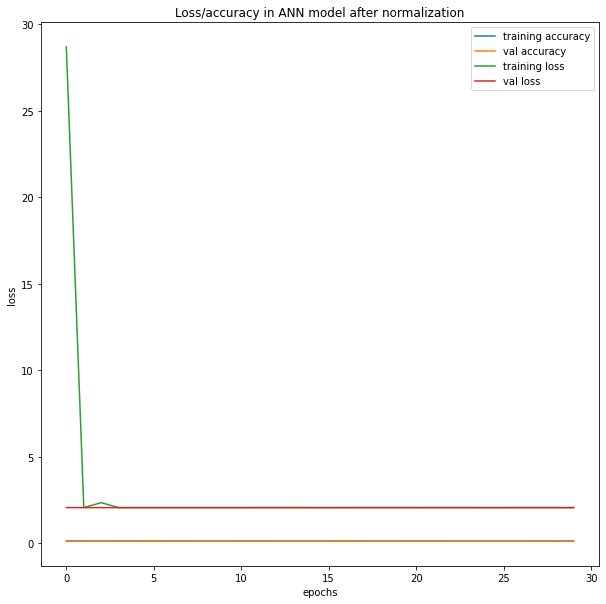

In [ ]:
#ANN model with Adam optimizer or default 0.01 learning rate
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#Evaluation of model
model.evaluate(X1_test, Y1_test)

44/44 [==============================] - 1s 23ms/step - loss: 2.0768 - accuracy: 0.1326


[2.0767858028411865, 0.13260869681835175]

In [ ]:
predict_x=model.predict(X1_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
#converting over Y test to actual labels.
Y1_test = np.argmax(Y1_test, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test, classes_x))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.00      0.00      0.00       165
           2       0.00      0.00      0.00       187
           3       0.00      0.00      0.00       134
           4       0.00      0.00      0.00       158
           5       0.00      0.00      0.00       190
           6       0.13      1.00      0.23       183
           7       0.00      0.00      0.00       158

    accuracy                           0.13      1380
   macro avg       0.02      0.12      0.03      1380
weighted avg       0.02      0.13      0.03      1380



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, classes_x)

array([[[1175,    0],
        [ 205,    0]],

       [[1215,    0],
        [ 165,    0]],

       [[1193,    0],
        [ 187,    0]],

       [[1246,    0],
        [ 134,    0]],

       [[1222,    0],
        [ 158,    0]],

       [[1190,    0],
        [ 190,    0]],

       [[   0, 1197],
        [   0,  183]],

       [[1222,    0],
        [ 158,    0]]])

Done for final test

### TRYING OPTIMIZER RMSProp WITH LEARNING RATE=0.01 and batch size=256

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt_a2, metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history = model.fit(X1_train, Y1_train, batch_size=256, epochs=30, validation_split=0.2)

Epoch 1/30
18/18 [==============================] - 10s 390ms/step - loss: 688.1940 - accuracy: 0.1866 - val_loss: 23.9815 - val_accuracy: 0.1839
Epoch 2/30
18/18 [==============================] - 7s 368ms/step - loss: 8.5138 - accuracy: 0.2870 - val_loss: 2.3981 - val_accuracy: 0.2871
Epoch 3/30
18/18 [==============================] - 7s 369ms/step - loss: 1.7583 - accuracy: 0.3708 - val_loss: 2.0176 - val_accuracy: 0.2400
Epoch 4/30
18/18 [==============================] - 7s 368ms/step - loss: 1.7981 - accuracy: 0.3126 - val_loss: 13.3996 - val_accuracy: 0.1295
Epoch 5/30
18/18 [==============================] - 7s 369ms/step - loss: 14.6854 - accuracy: 0.2100 - val_loss: 1.8993 - val_accuracy: 0.2274
Epoch 6/30
18/18 [==============================] - 7s 369ms/step - loss: 6.1410 - accuracy: 0.2487 - val_loss: 2.3006 - val_accuracy: 0.1268
Epoch 7/30
18/18 [==============================] - 7s 370ms/step - loss: 1.9257 - accuracy: 0.2301 - val_loss: 2.4034 - val_accuracy: 0.2364


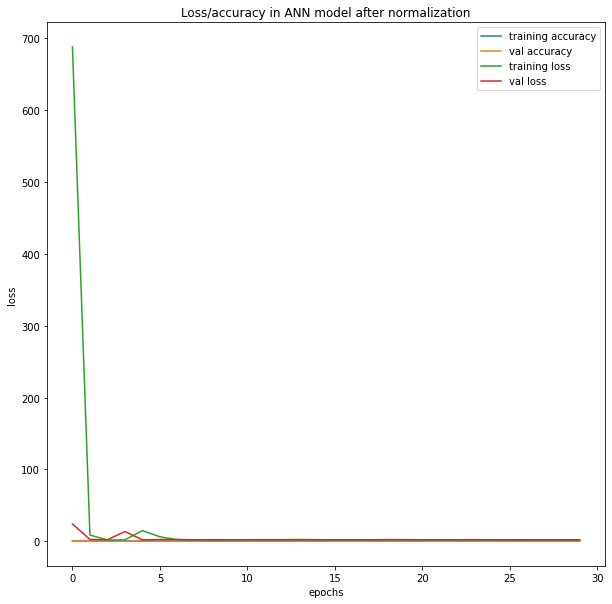

In [ ]:
#ANN model with SGD optimizer or default 0.01 learning rate
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#Evaluation of model
model.evaluate(X1_test, Y1_test)

44/44 [==============================] - 1s 24ms/step - loss: 1.9332 - accuracy: 0.2181


[1.9332376718521118, 0.2181159406900406]

In [ ]:
predict_x=model.predict(X1_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
#converting over Y test to actual labels.
Y1_test = np.argmax(Y1_test, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test, classes_x))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       206
           1       0.00      0.00      0.00       163
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00       143
           4       0.00      0.00      0.00       138
           5       0.15      0.99      0.27       196
           6       0.96      0.51      0.67       207
           7       0.00      0.00      0.00       152

    accuracy                           0.22      1380
   macro avg       0.14      0.19      0.12      1380
weighted avg       0.17      0.22      0.14      1380



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, classes_x)

array([[[1174,    0],
        [ 206,    0]],

       [[1217,    0],
        [ 163,    0]],

       [[1199,    6],
        [ 175,    0]],

       [[1237,    0],
        [ 143,    0]],

       [[1242,    0],
        [ 138,    0]],

       [[ 115, 1069],
        [   1,  195]],

       [[1169,    4],
        [ 101,  106]],

       [[1228,    0],
        [ 152,    0]]])

Done for the final test

### AFTER CHANGING THE LEARNING RATE AT 0.01 WITH SGD OPTIMIZER AND BATCH SIZE=32

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history = model.fit(X1_train, Y1_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
138/138 [==============================] - 14s 98ms/step - loss: 1.6752 - accuracy: 0.4272 - val_loss: 1.1646 - val_accuracy: 0.6069
Epoch 2/30
138/138 [==============================] - 12s 86ms/step - loss: 1.0499 - accuracy: 0.6285 - val_loss: 1.0310 - val_accuracy: 0.6277
Epoch 3/30
138/138 [==============================] - 12s 86ms/step - loss: 0.8602 - accuracy: 0.6849 - val_loss: 0.8749 - val_accuracy: 0.6857
Epoch 4/30
138/138 [==============================] - 12s 86ms/step - loss: 0.7622 - accuracy: 0.7273 - val_loss: 0.8562 - val_accuracy: 0.6966
Epoch 5/30
138/138 [==============================] - 12s 86ms/step - loss: 0.6976 - accuracy: 0.7420 - val_loss: 0.7416 - val_accuracy: 0.7337
Epoch 6/30
138/138 [==============================] - 12s 86ms/step - loss: 0.6332 - accuracy: 0.7805 - val_loss: 0.8719 - val_accuracy: 0.7111
Epoch 7/30
138/138 [==============================] - 12s 86ms/step - loss: 0.5752 - accuracy: 0.7939 - val_loss: 0.6679 - val_accuracy:

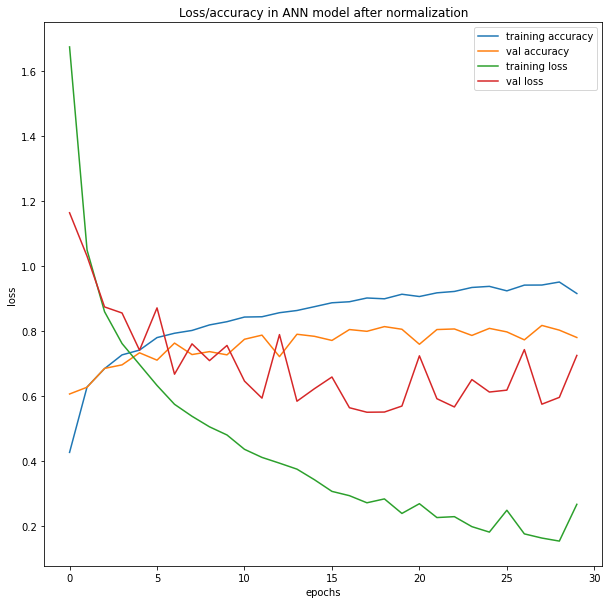

In [ ]:
#ANN model with SGD optimizer or default 0.01 learning rate
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#Evaluation of model
model.evaluate(X1_test, Y1_test)

44/44 [==============================] - 1s 33ms/step - loss: 0.6751 - accuracy: 0.7884


[0.6750873327255249, 0.7884057760238647]

In [ ]:
predict_x=model.predict(X1_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
#converting over Y test to actual labels.
Y1_test = np.argmax(Y1_test, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test, classes_x))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       206
           1       0.92      0.59      0.72       163
           2       0.49      0.68      0.57       175
           3       0.98      0.84      0.90       143
           4       0.58      0.35      0.43       138
           5       0.88      0.85      0.87       196
           6       0.81      1.00      0.90       207
           7       0.87      0.84      0.86       152

    accuracy                           0.79      1380
   macro avg       0.80      0.77      0.77      1380
weighted avg       0.80      0.79      0.78      1380



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, classes_x)

array([[[1141,   33],
        [   3,  203]],

       [[1209,    8],
        [  67,   96]],

       [[1082,  123],
        [  56,  119]],

       [[1234,    3],
        [  23,  120]],

       [[1207,   35],
        [  90,   48]],

       [[1161,   23],
        [  29,  167]],

       [[1125,   48],
        [   0,  207]],

       [[1209,   19],
        [  24,  128]]])

### AFTER CHANGING THE LEARNING RATE AT 0.001 WITH NADAM OPTIMIZER FOR A FASTER CONVERGENCE

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history = model.fit(X1_train, Y1_train, epochs=30, batch_size=32,validation_split=0.2)

Epoch 1/30
138/138 [==============================] - 29s 200ms/step - loss: 6.0667 - accuracy: 0.4220 - val_loss: 1.7742 - val_accuracy: 0.4855
Epoch 2/30
138/138 [==============================] - 28s 199ms/step - loss: 1.1912 - accuracy: 0.6328 - val_loss: 0.9728 - val_accuracy: 0.6775
Epoch 3/30
138/138 [==============================] - 27s 199ms/step - loss: 0.9179 - accuracy: 0.6917 - val_loss: 1.0358 - val_accuracy: 0.6621
Epoch 4/30
138/138 [==============================] - 27s 199ms/step - loss: 0.7576 - accuracy: 0.7395 - val_loss: 1.0449 - val_accuracy: 0.6594
Epoch 5/30
138/138 [==============================] - 27s 199ms/step - loss: 0.6999 - accuracy: 0.7558 - val_loss: 0.7305 - val_accuracy: 0.7518
Epoch 6/30
138/138 [==============================] - 27s 199ms/step - loss: 0.6276 - accuracy: 0.7721 - val_loss: 0.7308 - val_accuracy: 0.7482
Epoch 7/30
138/138 [==============================] - 27s 198ms/step - loss: 0.5723 - accuracy: 0.7912 - val_loss: 0.7746 - val_ac

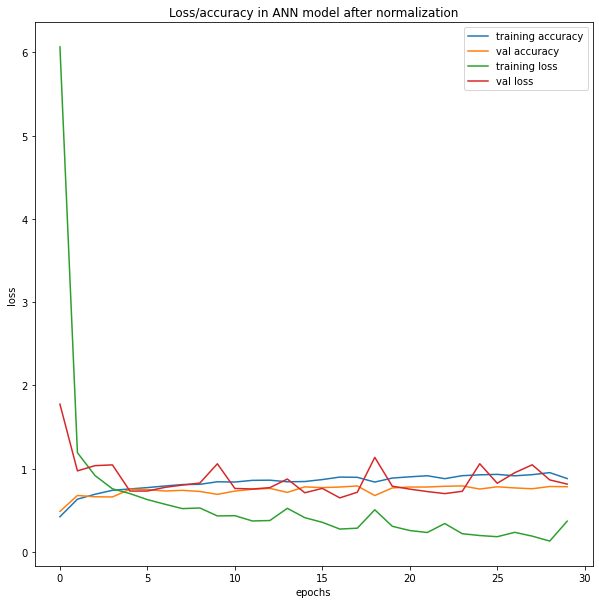

In [ ]:
#ANN model with SGD optimizer or default 0.01 learning rate
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#Evaluation of model
model.evaluate(X1_test, Y1_test)

44/44 [==============================] - 1s 23ms/step - loss: 0.8196 - accuracy: 0.7899


[0.8196171522140503, 0.7898550629615784]

In [ ]:
predict_x=model.predict(X1_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
#converting over Y test to actual labels.
Y1_test = np.argmax(Y1_test, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test, classes_x))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       206
           1       0.85      0.58      0.69       163
           2       0.54      0.62      0.58       175
           3       0.93      0.87      0.90       143
           4       0.43      0.54      0.48       138
           5       0.89      0.83      0.86       196
           6       0.91      0.99      0.95       207
           7       0.86      0.84      0.85       152

    accuracy                           0.79      1380
   macro avg       0.79      0.78      0.78      1380
weighted avg       0.81      0.79      0.79      1380



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, classes_x)

array([[[1165,    9],
        [  14,  192]],

       [[1200,   17],
        [  68,   95]],

       [[1112,   93],
        [  66,  109]],

       [[1227,   10],
        [  19,  124]],

       [[1143,   99],
        [  64,   74]],

       [[1164,   20],
        [  33,  163]],

       [[1152,   21],
        [   2,  205]],

       [[1207,   21],
        [  24,  128]]])

Done for the final test

### AFTER CHANGING THE LEARNING RATE AT 0.001 WITH ADAM OPTIMIZER AND EPOCHS TO 50

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history = model.fit(X1_train, Y1_train, epochs=50, validation_split=0.2)

Epoch 1/50
138/138 [==============================] - 18s 121ms/step - loss: 0.3526 - accuracy: 0.8759 - val_loss: 0.9216 - val_accuracy: 0.7600
Epoch 2/50
138/138 [==============================] - 16s 119ms/step - loss: 0.2278 - accuracy: 0.9187 - val_loss: 1.0278 - val_accuracy: 0.7355
Epoch 3/50
138/138 [==============================] - 17s 120ms/step - loss: 0.2498 - accuracy: 0.9092 - val_loss: 1.1265 - val_accuracy: 0.7391
Epoch 4/50
138/138 [==============================] - 16s 119ms/step - loss: 0.3655 - accuracy: 0.8840 - val_loss: 1.1126 - val_accuracy: 0.7500
Epoch 5/50
138/138 [==============================] - 16s 118ms/step - loss: 0.2054 - accuracy: 0.9210 - val_loss: 0.8130 - val_accuracy: 0.7917
Epoch 6/50
138/138 [==============================] - 16s 118ms/step - loss: 0.1713 - accuracy: 0.9357 - val_loss: 1.1769 - val_accuracy: 0.7609
Epoch 7/50
138/138 [==============================] - 16s 118ms/step - loss: 0.2185 - accuracy: 0.9196 - val_loss: 0.9764 - val_ac

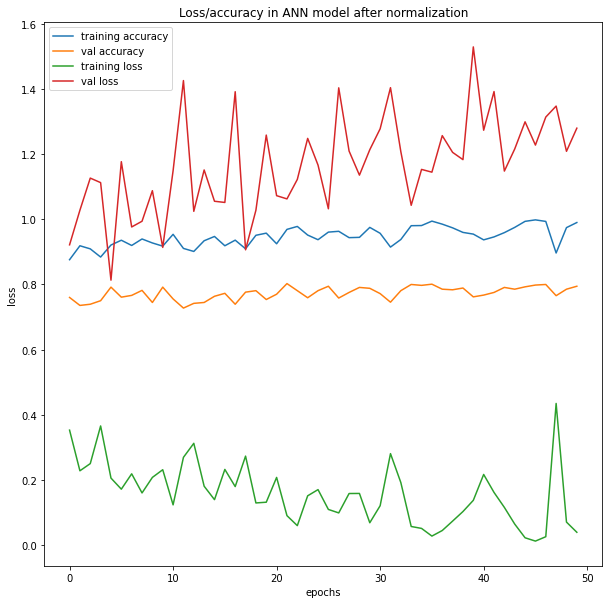

In [ ]:
#ANN model with Adam optimizer or default 0.01 learning rate
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### AFTER CHANGING THE LEARNING RATE AT 0.01 WITH SGD OPTIMIZER AND EPOCHS TO 50

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history = model.fit(X1_train, Y1_train, epochs=50, validation_split=0.2)

Epoch 1/50
138/138 [==============================] - 13s 88ms/step - loss: 0.0122 - accuracy: 0.9984 - val_loss: 1.2946 - val_accuracy: 0.7953
Epoch 2/50
138/138 [==============================] - 12s 85ms/step - loss: 0.0072 - accuracy: 0.9993 - val_loss: 1.3298 - val_accuracy: 0.8016
Epoch 3/50
138/138 [==============================] - 12s 85ms/step - loss: 0.0059 - accuracy: 0.9998 - val_loss: 1.3742 - val_accuracy: 0.7980
Epoch 4/50
138/138 [==============================] - 12s 86ms/step - loss: 0.0057 - accuracy: 0.9995 - val_loss: 1.3956 - val_accuracy: 0.8007
Epoch 5/50
138/138 [==============================] - 12s 86ms/step - loss: 0.0048 - accuracy: 0.9995 - val_loss: 1.4131 - val_accuracy: 0.8016
Epoch 6/50
138/138 [==============================] - 12s 85ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 1.4379 - val_accuracy: 0.8007
Epoch 7/50
138/138 [==============================] - 12s 85ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 1.4582 - val_accuracy:

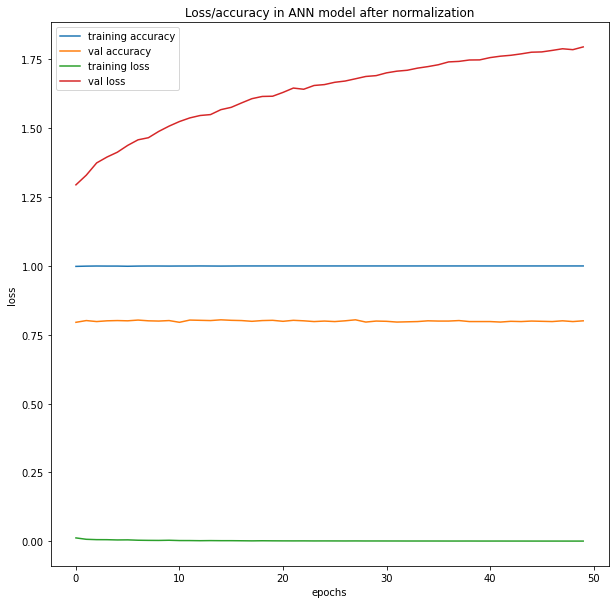

In [ ]:
#ANN model with SGD optimizer or default 0.01 learning rate
plt.figure(figsize = (10,10))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
predict_x=model.predict(X1_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test, classes_x))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       206
           1       0.84      0.69      0.75       163
           2       0.53      0.63      0.58       175
           3       0.93      0.81      0.87       143
           4       0.49      0.50      0.49       138
           5       0.84      0.85      0.84       196
           6       0.93      1.00      0.96       207
           7       0.87      0.84      0.85       152

    accuracy                           0.80      1380
   macro avg       0.80      0.78      0.79      1380
weighted avg       0.81      0.80      0.80      1380



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, classes_x)

array([[[1166,    8],
        [   9,  197]],

       [[1195,   22],
        [  51,  112]],

       [[1106,   99],
        [  64,  111]],

       [[1228,    9],
        [  27,  116]],

       [[1170,   72],
        [  69,   69]],

       [[1153,   31],
        [  30,  166]],

       [[1157,   16],
        [   1,  206]],

       [[1209,   19],
        [  25,  127]]])

### AFTER AUGMENTING THE IMAGE:
      No OF EPOCHS: 50
      Optimizer: Adam/SGD both almost works the same. SGD works a little better than Adam at higher epochs.
      Loss: Categorical_Crossentropy
      Learning Rate: 0.01
      {We are using more epochs for SGD and hence mentioned the SGD default learning rate aver Adam)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.25,
                        horizontal_flip=True)

#### SGD AT LEARNING RATE =0.001, EPOCHS=25, AUGMENTED IMAGE

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history1 = model.fit_generator(data_generator.flow(X1_train, Y1_train), epochs=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/50
173/173 [==============================] - 29s 162ms/step - loss: 1.6754 - accuracy: 0.3696
Epoch 2/50
173/173 [==============================] - 28s 162ms/step - loss: 1.3149 - accuracy: 0.5244
Epoch 3/50
173/173 [==============================] - 28s 162ms/step - loss: 1.2085 - accuracy: 0.5583
Epoch 4/50
173/173 [==============================] - 28s 162ms/step - loss: 1.1512 - accuracy: 0.5793
Epoch 5/50
173/173 [==============================] - 28s 161ms/step - loss: 1.1065 - accuracy: 0.6019
Epoch 6/50
173/173 [==============================] - 28s 161ms/step - loss: 1.0699 - accuracy: 0.6115
Epoch 7/50
173/173 [==============================] - 28s 161ms/step - loss: 1.0336 - accuracy: 0.6251
Epoch 8/50
173/173 [==============================] - 28s 161ms/step - loss: 0.9869 - accuracy: 0.6405
Epoch 9/50
173/173 [==============================] - 28s 162ms/step - loss: 0.9850 - accuracy: 0.6431
Epoch 10/50
173/173 [==============================] - 28s 161ms/step - l

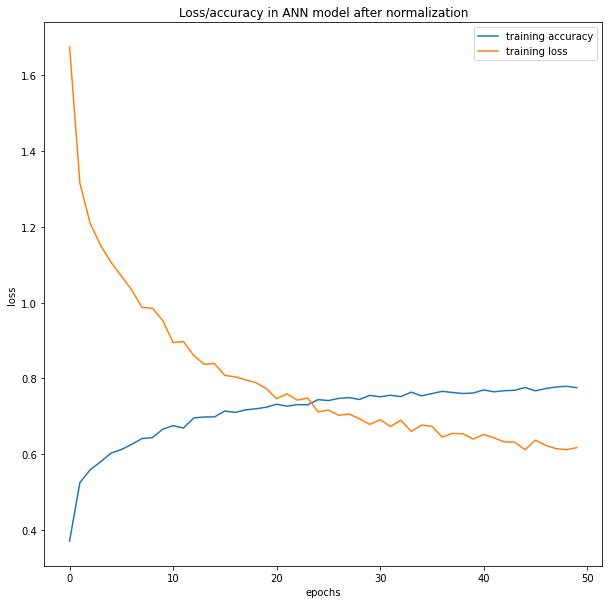

In [ ]:
#ANN model with SGD optimizer or default 0.01 learning rate
plt.figure(figsize = (10,10))
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['loss'], label='training loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#Evaluation of model
model.evaluate(X1_test, Y1_test)

44/44 [==============================] - 1s 23ms/step - loss: 0.5455 - accuracy: 0.8014


[0.5455224514007568, 0.8014492988586426]

In [ ]:
predict_x=model.predict(X1_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
#converting over Y test to actual labels.
Y1_test = np.argmax(Y1_test, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test, classes_x))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       206
           1       0.85      0.67      0.75       163
           2       0.58      0.73      0.64       175
           3       0.74      0.83      0.78       143
           4       0.62      0.26      0.37       138
           5       0.86      0.90      0.88       196
           6       0.94      1.00      0.97       207
           7       0.82      0.90      0.86       152

    accuracy                           0.80      1380
   macro avg       0.79      0.78      0.77      1380
weighted avg       0.80      0.80      0.79      1380



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, classes_x)

array([[[1149,   25],
        [  11,  195]],

       [[1197,   20],
        [  53,  110]],

       [[1112,   93],
        [  48,  127]],

       [[1195,   42],
        [  25,  118]],

       [[1220,   22],
        [ 102,   36]],

       [[1155,   29],
        [  19,  177]],

       [[1161,   12],
        [   1,  206]],

       [[1197,   31],
        [  15,  137]]])

#### Adam AT LEARNING RATE =0.001, EPOCHS=25, AUGMENTED IMAGE

In [ ]:
#let's compile the model using sgd optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#fitting the model in 30 epochs with validation split at 0.2 after normalization
history1 = model.fit_generator(data_generator.flow(X1_train, Y1_train), epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/25
173/173 [==============================] - 33s 179ms/step - loss: 4.1398 - accuracy: 0.3807
Epoch 2/25
173/173 [==============================] - 30s 175ms/step - loss: 1.9504 - accuracy: 0.4523
Epoch 3/25
173/173 [==============================] - 30s 175ms/step - loss: 1.5551 - accuracy: 0.5048
Epoch 4/25
173/173 [==============================] - 30s 175ms/step - loss: 1.4643 - accuracy: 0.5169
Epoch 5/25
173/173 [==============================] - 30s 174ms/step - loss: 1.2800 - accuracy: 0.5606
Epoch 6/25
173/173 [==============================] - 30s 175ms/step - loss: 1.1995 - accuracy: 0.5862
Epoch 7/25
173/173 [==============================] - 30s 174ms/step - loss: 1.2117 - accuracy: 0.5689
Epoch 8/25
173/173 [==============================] - 30s 174ms/step - loss: 1.1227 - accuracy: 0.6106
Epoch 9/25
173/173 [==============================] - 30s 174ms/step - loss: 1.1234 - accuracy: 0.6007
Epoch 10/25
173/173 [==============================] - 30s 175ms/step - l

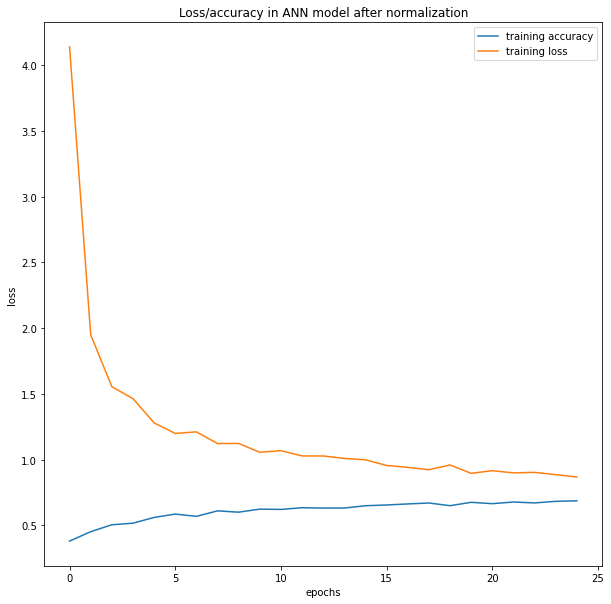

In [ ]:
#ANN model with SGD optimizer or default 0.01 learning rate
plt.figure(figsize = (10,10))
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['loss'], label='training loss')
plt.title('Loss/accuracy in ANN model after normalization')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
predict_x=model.predict(X1_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
#converting over Y test to actual labels.
Y1_test = np.argmax(Y1_test, axis = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test, classes_x))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       206
           1       0.68      0.72      0.70       163
           2       0.66      0.35      0.46       175
           3       0.82      0.66      0.73       143
           4       0.44      0.35      0.39       138
           5       0.58      0.93      0.71       196
           6       0.86      0.99      0.92       207
           7       0.93      0.63      0.75       152

    accuracy                           0.72      1380
   macro avg       0.72      0.70      0.69      1380
weighted avg       0.73      0.72      0.71      1380



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y1_test, classes_x)

array([[[1132,   42],
        [  15,  191]],

       [[1161,   56],
        [  46,  117]],

       [[1174,   31],
        [ 114,   61]],

       [[1216,   21],
        [  48,   95]],

       [[1182,   60],
        [  90,   48]],

       [[1050,  134],
        [  13,  183]],

       [[1140,   33],
        [   2,  205]],

       [[1221,    7],
        [  56,   96]]])